# Regressão linear

[https://www.kaggle.com/vedavyasv/usa-housing](https://www.kaggle.com/vedavyasv/usa-housing)

### Bibliotecas e Carregamento

In [72]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('../datasets/USA_Housing.csv')

### Informações Iniciais

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 254.0+ KB


In [21]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


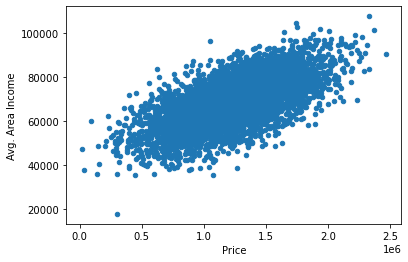

In [22]:
df.plot.scatter(x='Price', y='Avg. Area Income')

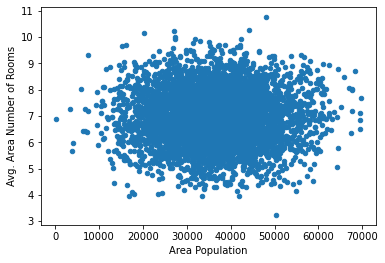

In [23]:
df.plot.scatter(x='Area Population', y='Avg. Area Number of Rooms')

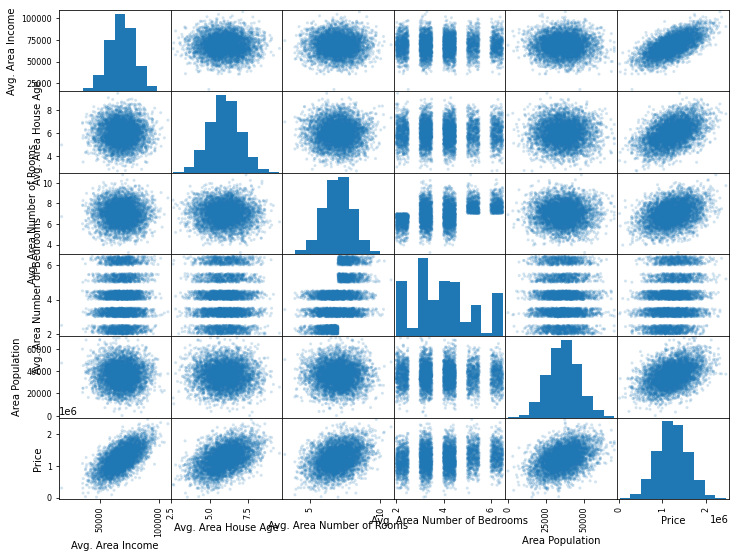

In [18]:
_ = scatter_matrix(df, alpha=.2, figsize=(12, 9))

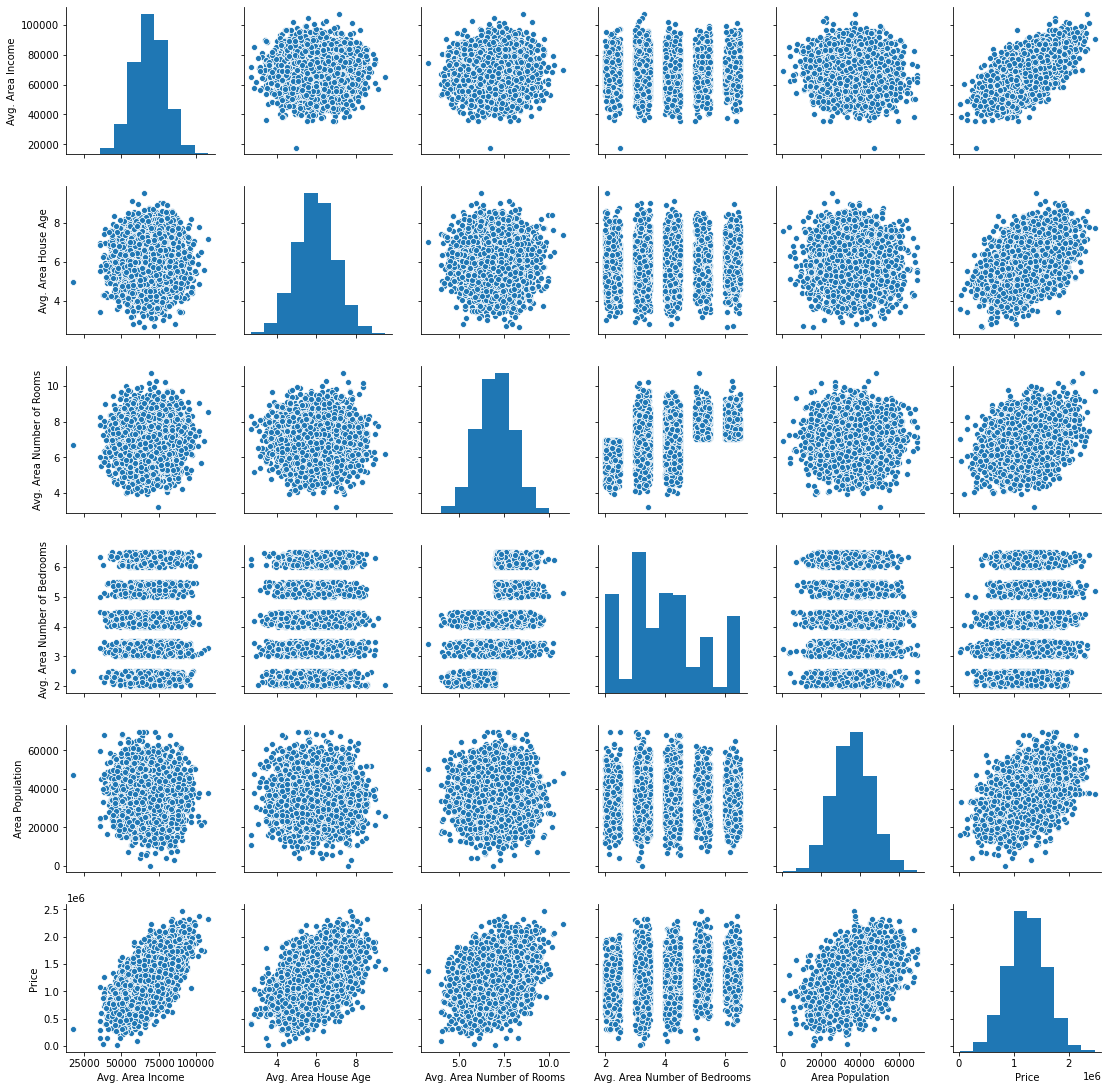

In [20]:
sns.pairplot(df)

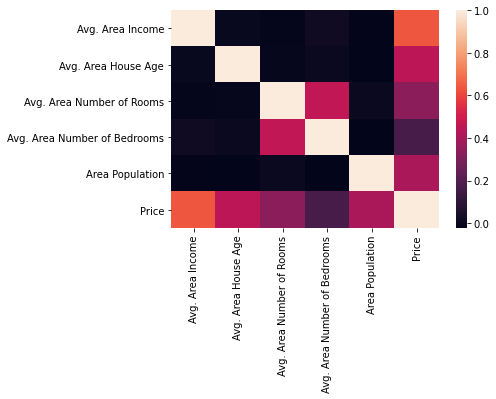

In [24]:
sns.heatmap(df.corr())

### Split dos dados

In [60]:
from sklearn.model_selection import train_test_split

In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [38]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [27]:
y = df['Price']

In [39]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Criando um modelo

In [61]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression()

### Avaliando os coeficientes $\Theta$

In [42]:
lm.intercept_

-2645289.864342764

In [43]:
lm.coef_

array([2.16398550e+01, 1.65729214e+05, 1.20958349e+05, 1.94909254e+03,
       1.52262240e+01])

In [45]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coefs

,Coefs
Avg. Area Income,21.639855
Avg. Area House Age,165729.214008
Avg. Area Number of Rooms,120958.348945
Avg. Area Number of Bedrooms,1949.092538
Area Population,15.226224


### Utilizando o modelo

In [47]:
y_hat = lm.predict(X_test)

### Qualidade do modelo

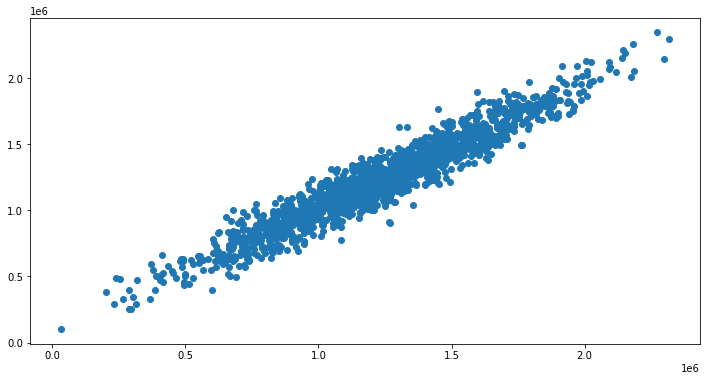

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_hat)

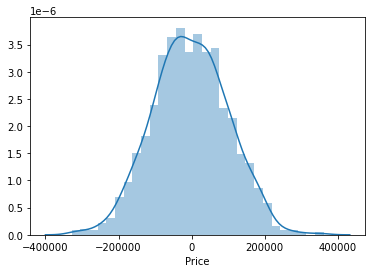

In [66]:
sns.distplot(y_test - y_hat)

### Métricas de avaliação

1. Erro absoluto médio (Mean Absolute Error - MAE):

    \begin{equation}
        \displaystyle\frac{1}{m}\sum_{i=1}^m \left\lvert y_i - \hat{y}_i\right\rvert
    \end{equation}
    
    > *MAE* é o mais fácil de entender, porque é o erro médio simples

1. Média dos quadrados dos erros (Mean Squared Error - MSE):
    
    \begin{equation}
        \displaystyle\frac{1}{m}\sum_{i=1}^m \left(y_i - \hat{y}_i\right)^2
    \end{equation}
    
    > *MSE* é mais popular que o MAE, porque o *MSE* pune erros maiores
    
1. Raiz do erro médio quadrado (Root Mean Squared Error - RMSE):

    \begin{equation}
        \displaystyle\sqrt{\frac{1}{m}\sum_{i=1}^m \left(y_i - \hat{y}_i\right)^2}
    \end{equation}
    
    > *RMSE* ainda mais porpular porque é interpretável nas unidades de $y$

In [67]:
from sklearn import metrics

In [74]:
print(f'MAE: {metrics.mean_absolute_error(y_test, y_hat):.4f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_hat):.4f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_hat)):.4f}')

MAE: 82745.9089
MSE: 10567448570.9306
RMSE: 102798.0961
